In [ ]:
# Import the necessary libraries that I need to perform the analysis.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



Before launching a dealership, it is essential to understand the key factors that shape the car market.
This analysis examines the primary influences on car pricing, including brand, model, year, engine size, fuel type, mileage, and ownership history.
By identifying trends and correlations, the goal is to make informed, data-driven decisions that optimize inventory management, pricing strategies, and market positioning.

Key Focus Areas:

Mileage – Influences depreciation and perceived vehicle condition.

Fuel Type – Helps track shifts in consumer demand, such as the growing preference for electric vehicles.

Year of Manufacture – Highlights depreciation trends and demand for newer models.

Ownership History – Impacts consumer confidence and resale value.

Price – Determines profitability and market competitiveness.

In [ ]:

# Load csv file to pandas
df = pd.read_csv("car_price_dataset.csv", sep=";") 

In [11]:
display(df.info)
display(df.describe())
display(df.dtypes)

<bound method DataFrame.info of            Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3    

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

In [ ]:
# Remove missing values from the table to ensure the quality of the analysis.
df.dropna(inplace=True)

In [ ]:
#  information about the dataframe, if you want to change anything or know deatils about the data
display(df.describe)

<bound method NDFrame.describe of            Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3  

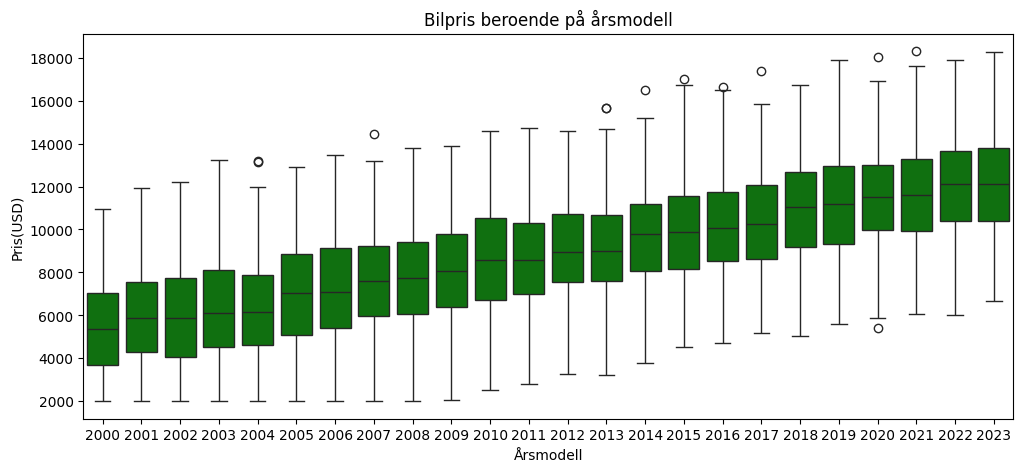

In [ ]:
# To double-check that the data aligns with reality, it's important to verify that the price increase over time matches the typical market trends. If the data shows that prices are rising over time, it likely reflects the general depreciation pattern and the market's shift towards newer models with higher prices.
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="Year", y="Price", color="green")
plt.title("Bilpris beroende på årsmodell")
plt.xlabel("Årsmodell")
plt.ylabel("Pris(USD)")
plt.show()

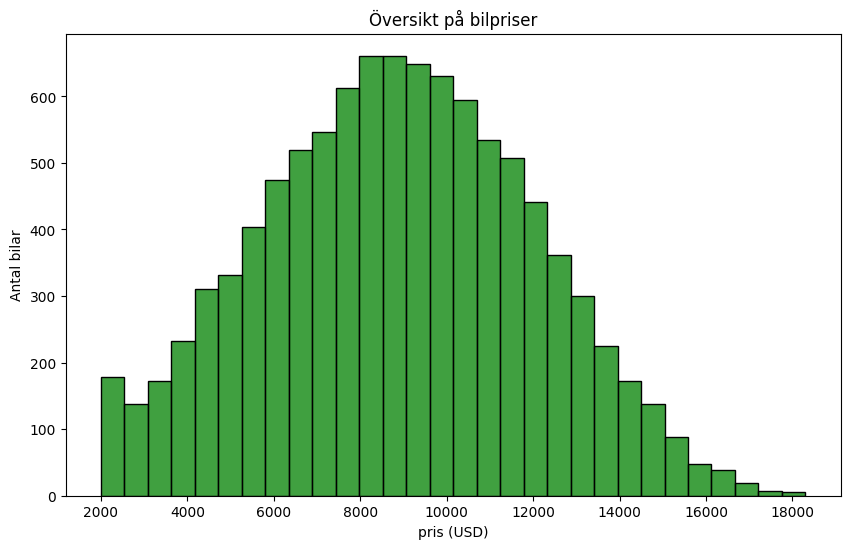

In [ ]:
# The code displays the number of cars sold at different price ranges, providing a useful overview of where to focus when making purchasing decisions.
plt.figure(figsize=(10 ,6))
sns.histplot(df["Price"], bins=30, color="green")
plt.title("Översikt på bilpriser")
plt.xlabel("pris (USD)")
plt.ylabel("Antal bilar")

plt.show()

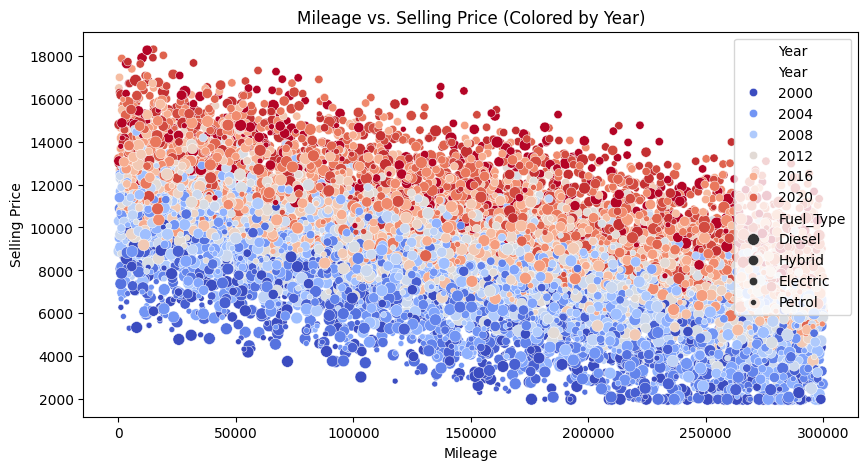

In [ ]:
# This scatter plot shows mileage vs. sales price, with varying plot sizes representing fuel type and colors indicating year of manufacture. It highlights that newer cars generally sell for higher prices, but their value decreases as mileage increases.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Mileage', y='Price', hue='Year', palette='coolwarm', size='Fuel_Type')
plt.xlabel("Mileage")
plt.ylabel("Selling Price")
plt.title("Mileage vs. Selling Price (Colored by Year)")
plt.legend(title="Year")
plt.show()

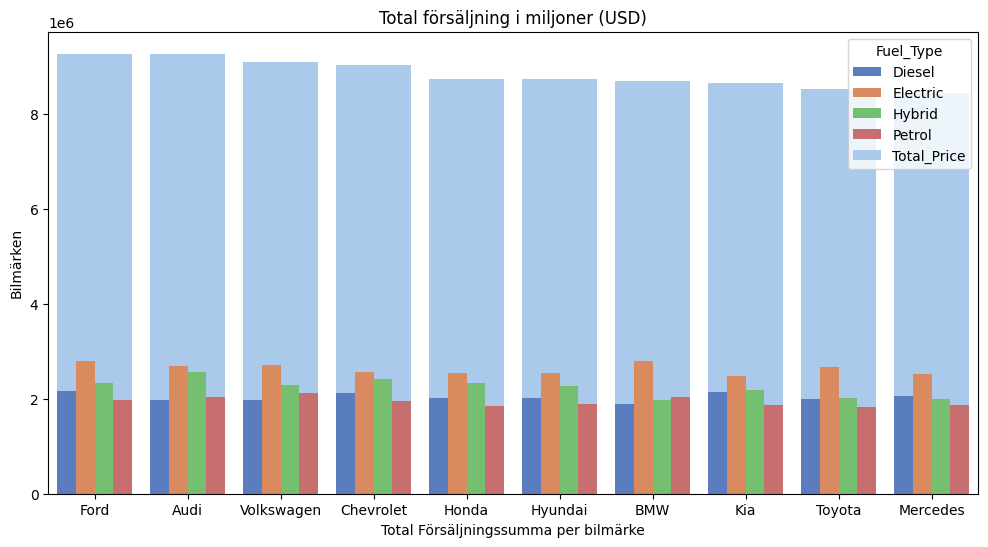

In [ ]:
# This graph displays the car brands with the highest sales value and identifies which fuel type has the highest sales value.
total_per_märke_bränsle = df.groupby(["Brand", "Fuel_Type"])["Price"].sum().reset_index()
totalt_pris_per_märke = df.groupby("Brand")["Price"].sum().reset_index()
totalt_pris_per_märke = totalt_pris_per_märke.sort_values("Price", ascending=False)

plt.figure(figsize=(12, 6))

sns.set_color_codes("pastel")
sns.barplot(data=totalt_pris_per_märke, x="Brand", y="Price", label="Total_Price", color="b")
sns.barplot(data=total_per_märke_bränsle, x="Brand", y="Price", hue="Fuel_Type", palette="muted", dodge=True )
plt.title("Total försäljning i miljoner (USD)")
plt.xlabel("Total Försäljningssumma per bilmärke")
plt.ylabel("Bilmärken")

plt.show()

C:\Users\Max\AppData\Local\Temp\ipykernel_25888\3893012177.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_counts = df.groupby(["Pricebins", "Brand"]).size().reset_index(name="count")
C:\Users\Max\AppData\Local\Temp\ipykernel_25888\3893012177.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dominat_bands = brand_counts.loc[brand_counts.groupby("Pricebins")["count"].idxmax()]


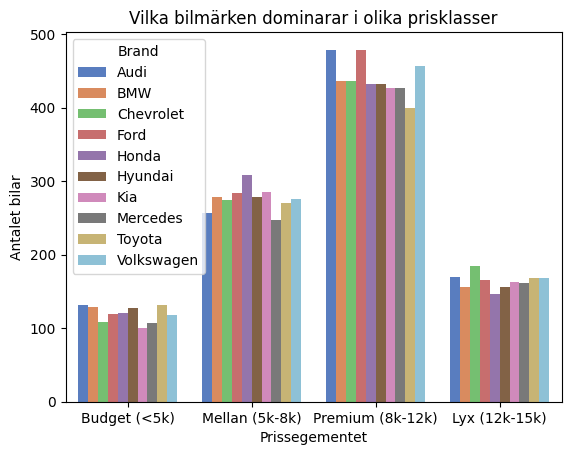

In [ ]:
# To gain a deeper analysis, I categorize the prices into different price segments to identify which car brands dominate each range. This helps determine where to focus when making purchasing decisions.
df = pd.read_csv("car_price_dataset.csv", sep=";")

bins = [0, 5000, 8000, 12000, 20000]
labels = ["Budget (<5k)", "Mellan (5k-8k)", "Premium (8k-12k)", "Lyx (12k-15k)"] 
df["Pricebins"] = pd.cut(df["Price"], bins=bins, labels=labels)

brand_counts = df.groupby(["Pricebins", "Brand"]).size().reset_index(name="count")
dominat_bands = brand_counts.loc[brand_counts.groupby("Pricebins")["count"].idxmax()]

sns.barplot(data=brand_counts, x="Pricebins", y="count", hue="Brand", dodge=True, palette="muted")
plt.title("Vilka bilmärken dominarar i olika prisklasser")
plt.xlabel("Prissegementet")
plt.ylabel("Antalet bilar")

plt.show()

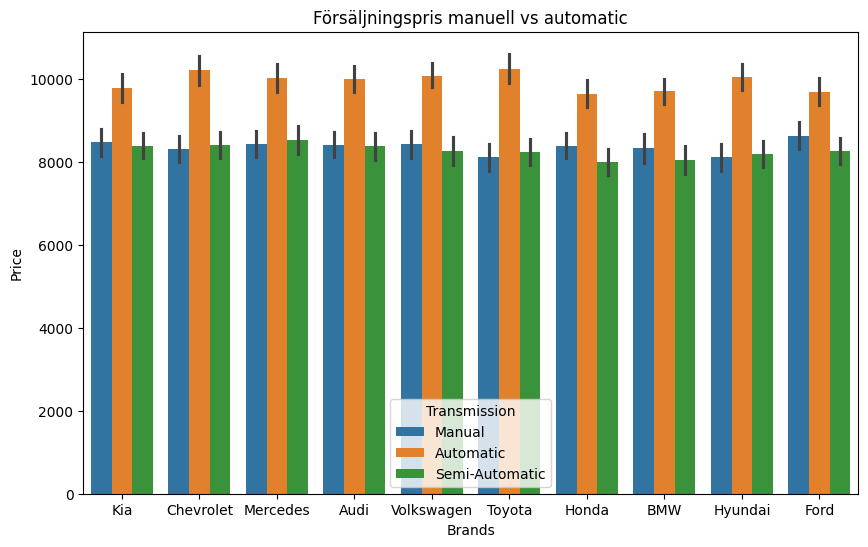

In [ ]:
#  The graph shows that automatic cars have a higher sales value compared to semi-automatic and manual vehicles.
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Brand", y="Price", hue="Transmission")

plt.title("Försäljningspris manuell vs automatic") 
plt.xlabel("Brands")
plt.ylabel("Price")

plt.show()

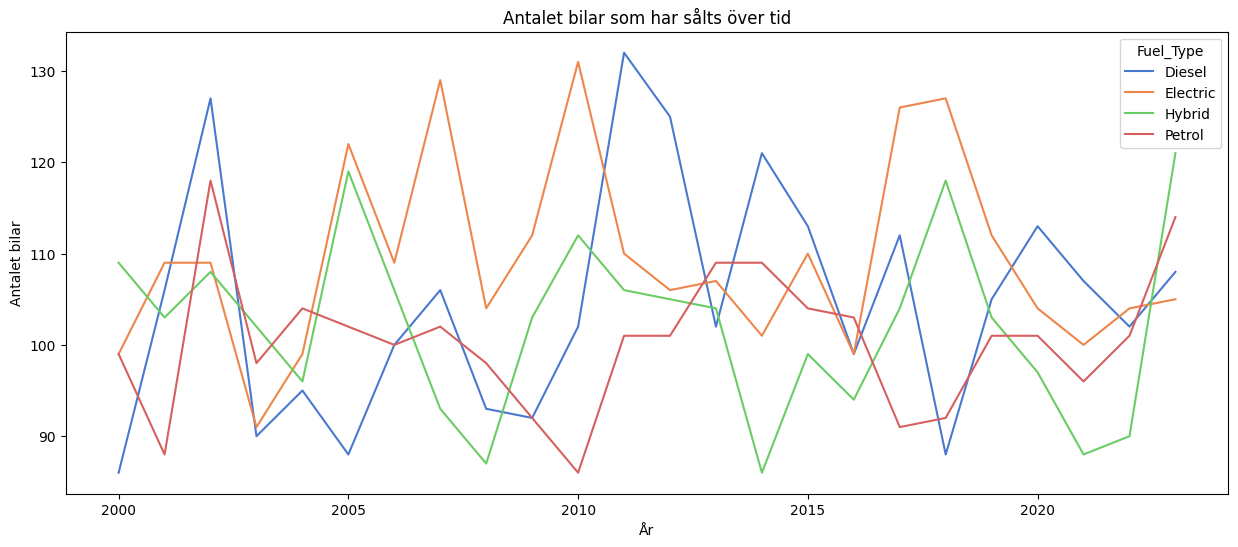

In [ ]:
# The graph displays the number of cars sold between 2000 and 2023. This analysis shows that diesel and electric vehicles have had strong sales, while projections indicate that hybrid cars will become increasingly popular in the future.

Sales_brands = df.groupby(["Year", "Fuel_Type"]).Brand.count().to_frame().rename({"Brand": "Count"}, axis =1)

plt.figure(figsize=(15, 6))
sns.lineplot(data=Sales_brands, x="Year", y="Count", hue="Fuel_Type", palette="muted")
plt.title("Antalet bilar som har sålts över tid")
plt.xlabel("År")
plt.ylabel("Antalet bilar")

plt.show()

Text(0.5, 1.0, 'Snittpris för olika märken med ett högtmiltal')

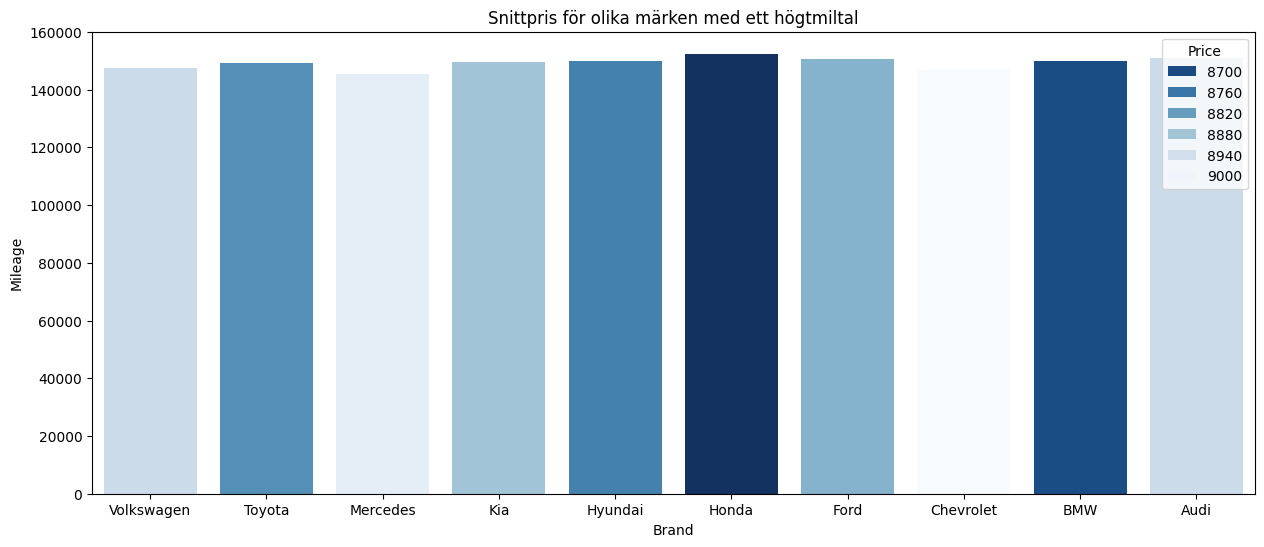

In [ ]:
# The graph shows that the brand Honda has a higher average price compared to other brands, even for cars with higher mileage. Therefore, if the focus is on acquiring cars with higher mileage, Honda, BMW, and Toyota would be strong choices to consider.
stats_by_model = df.groupby('Brand').agg({'Mileage': 'mean', 'Price': 'mean'}).reset_index()
stats_by_model = stats_by_model.sort_values(by='Brand', ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(data=stats_by_model, x='Brand', y='Mileage', hue="Price", palette='Blues_r')
plt.title("Snittpris för olika märken med ett högtmiltal")

In [50]:
# The statistics show which brands and models have the average mileage, median mileage, and average selling price. This information can be used as a reference when pricing the next car for sale. Additionally, it provides insights into how many cars have been sold within that range, helping to make informed sales decisions.
mileage_price_stats = df.groupby(["Brand", "Model"]).agg(
    mean_mileage=("Mileage", "mean"),
    median_mileage=("Mileage", "median"),
    mean_price=("Price", "mean"),
    count=("Model", "count")
).reset_index()

top_mileage_models = mileage_price_stats.sort_values(by="mean_mileage", ascending=False)
print(top_mileage_models.sort_values("mean_price", ascending=False))

         Brand     Model   mean_mileage  median_mileage   mean_price  count
6    Chevrolet   Equinox  148450.701587        144144.0  9156.320635    315
29  Volkswagen    Tiguan  147448.017045        151462.5  9098.863636    352
23    Mercedes       GLA  140704.244444        138278.0  9049.844444    315
7    Chevrolet    Impala  140331.921127        135355.0  9001.115493    355
25      Toyota   Corolla  146098.809231        144910.0  8996.618462    325
18         Kia    Optima  145047.059524        147150.0  8996.318452    336
10        Ford    Fiesta  149637.101928        150643.0  8971.077135    363
22    Mercedes   E-Class  145765.566978        145664.0  8967.330218    321
2         Audi        Q5  152030.394286        158917.5  8955.257143    350
21    Mercedes   C-Class  150166.895425        146668.5  8921.660131    306
1         Audi        A4  149406.754286        152233.5  8919.962857    350
28  Volkswagen    Passat  149929.811550        149573.0  8914.072948    329
0         Au

## Executive summary: 

Analysis Insights
The majority of cars are priced between $5,000 and $12,000, with a tendency towards the lower price range. However, some cases fall into either budget-friendly or luxury price segments.

The analysis reveals a negative correlation between price and mileage, which is expected—higher-mileage cars tend to be cheaper. The ideal "sweet spot" is to acquire cars with higher mileage but still within a reasonable price range, balancing affordability and resale value. Additionally, newer cars are priced significantly higher than those manufactured in the early 2000s. This aligns with standard depreciation trends, as newer models tend to retain their value better.

Among brands, Ford holds the highest market value in terms of sold cars, with Audi following closely behind. However, this does not necessarily mean Ford is the most sold brand; rather, it is noteworthy due to its strong presence in the U.S. market.

Fuel type also influences pricing, with electric cars typically commanding higher prices, as seen in the data visualization. Meanwhile, diesel and gasoline vehicles are more common in the lower price segment.

Furthermore, cars with fewer previous owners tend to have higher resale values, highlighting the importance of ownership history in determining price.

Strategic Recommendations:

Focus on acquiring low-mileage vehicles, as they retain value better and command higher prices.

Monitor the increasing demand for electric vehicles and adjust inventory accordingly for future sales.

Prioritize selling newer models, as they offer better profit margins, especially those with low mileage or few previous owners, resulting in higher customer interest.

Target brands and models with historically strong price stability to ensure consistent profitability.



